## https://www.kaggle.com/rikdifos/credit-card-approval-prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('credit_card_approval.xlsx')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1


In [3]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [4]:
df.groupby('OCCUPATION_TYPE').size()

OCCUPATION_TYPE
Accountants              15985
Cleaning staff            5845
Cooking staff             8076
Core staff               43007
Drivers                  26090
HR staff                   774
High skill tech staff    17289
IT staff                   604
Laborers                 78240
Low-skill Laborers        2140
Managers                 35487
Medicine staff           13520
Private service staff     3456
Realty agents             1041
Sales staff              41098
Secretaries               2044
Security staff            7993
Waiters/barmen staff      1665
dtype: int64

In [5]:
df.groupby('NAME_INCOME_TYPE').size()

NAME_INCOME_TYPE
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Working                 226104
dtype: int64

In [6]:
df.drop('OCCUPATION_TYPE',axis=1,inplace=True)

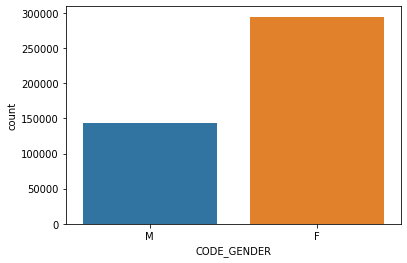

In [7]:
sns.countplot(df.CODE_GENDER,data=df)

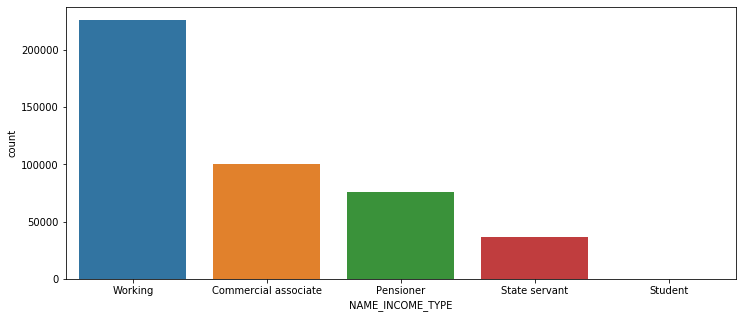

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(df.NAME_INCOME_TYPE,data=df)

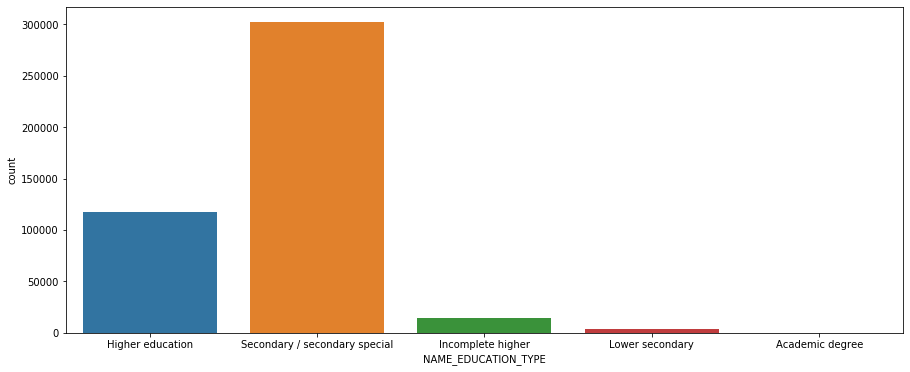

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(df.NAME_EDUCATION_TYPE,data=df)

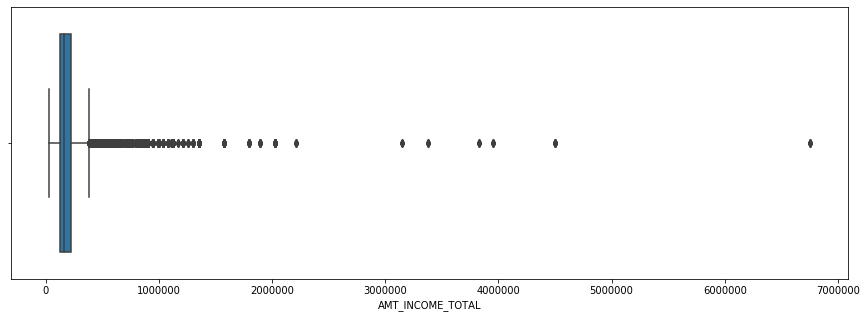

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(df.AMT_INCOME_TOTAL,data=df)

In [17]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,1


In [18]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [27]:
x=df.iloc[:,:].values

In [29]:
labelencoder=LabelEncoder()
x[:,1]=labelencoder.fit_transform(x[:,1])
x[:,2]=labelencoder.fit_transform(x[:,2])
x[:,3]=labelencoder.fit_transform(x[:,3])

In [30]:
columntransformer=ColumnTransformer([('encoder',OneHotEncoder(categories='auto'),[6])],remainder='passthrough')
x=columntransformer.fit_transform(x)

In [31]:
x=x[:,1:]

In [32]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,0,1,5008804,1,1,1,0,427500,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2
1,0,0,0,1,5008805,1,1,1,0,427500,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2
2,0,0,0,1,5008806,1,1,1,0,112500,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,2
3,0,0,0,0,5008808,0,0,1,0,270000,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,1
4,0,0,0,0,5008809,0,0,1,0,270000,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,1,0,0,0,6840104,1,0,1,0,135000,Secondary / secondary special,Separated,House / apartment,-22717,365243,0,0,0,1
438553,0,0,0,1,6840222,0,0,0,0,103500,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,0,0,0,1
438554,0,0,0,0,6841878,0,0,0,0,54000,Higher education,Single / not married,With parents,-8169,-372,1,0,0,1
438555,1,0,0,0,6842765,0,0,1,0,72000,Secondary / secondary special,Married,House / apartment,-21673,365243,0,0,0,2


In [33]:
columntransformer=ColumnTransformer([('encoder',OneHotEncoder(categories='auto'),[10])],remainder='passthrough')
x=columntransformer.fit_transform(x)
x=x[:,1:]

In [34]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,0,0,0,0,0,0,1,5008804,1,...,0,427500,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2
1,1,0,0,0,0,0,0,1,5008805,1,...,0,427500,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2
2,0,0,0,1,0,0,0,1,5008806,1,...,0,112500,Married,House / apartment,-21474,-1134,0,0,0,2
3,0,0,0,1,0,0,0,0,5008808,0,...,0,270000,Single / not married,House / apartment,-19110,-3051,0,1,1,1
4,0,0,0,1,0,0,0,0,5008809,0,...,0,270000,Single / not married,House / apartment,-19110,-3051,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,0,0,0,1,1,0,0,0,6840104,1,...,0,135000,Separated,House / apartment,-22717,365243,0,0,0,1
438553,0,0,0,1,0,0,0,1,6840222,0,...,0,103500,Single / not married,House / apartment,-15939,-3007,0,0,0,1
438554,1,0,0,0,0,0,0,0,6841878,0,...,0,54000,Single / not married,With parents,-8169,-372,1,0,0,1
438555,0,0,0,1,1,0,0,0,6842765,0,...,0,72000,Married,House / apartment,-21673,365243,0,0,0,2


In [35]:
columntransformer=ColumnTransformer([('encoder',OneHotEncoder(categories='auto'),[14])],remainder='passthrough')
x=columntransformer.fit_transform(x)
x=x[:,1:]

In [36]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,1,0,0,0,0,0,...,1,0,427500,Rented apartment,-12005,-4542,1,0,0,2
1,0,0,0,0,1,0,0,0,0,0,...,1,0,427500,Rented apartment,-12005,-4542,1,0,0,2
2,1,0,0,0,0,0,0,1,0,0,...,1,0,112500,House / apartment,-21474,-1134,0,0,0,2
3,0,0,1,0,0,0,0,1,0,0,...,1,0,270000,House / apartment,-19110,-3051,0,1,1,1
4,0,0,1,0,0,0,0,1,0,0,...,1,0,270000,House / apartment,-19110,-3051,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,0,1,0,0,0,0,0,1,1,0,...,1,0,135000,House / apartment,-22717,365243,0,0,0,1
438553,0,0,1,0,0,0,0,1,0,0,...,0,0,103500,House / apartment,-15939,-3007,0,0,0,1
438554,0,0,1,0,1,0,0,0,0,0,...,0,0,54000,With parents,-8169,-372,1,0,0,1
438555,1,0,0,0,0,0,0,1,1,0,...,1,0,72000,House / apartment,-21673,365243,0,0,0,2


In [37]:
columntransformer=ColumnTransformer([('encoder',OneHotEncoder(categories='auto'),[18])],remainder='passthrough')
x=columntransformer.fit_transform(x)
x=x[:,1:]

In [38]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,1,0,0,0,0,0,1,...,1,1,0,427500,-12005,-4542,1,0,0,2
1,0,0,0,1,0,0,0,0,0,1,...,1,1,0,427500,-12005,-4542,1,0,0,2
2,1,0,0,0,0,1,0,0,0,0,...,1,1,0,112500,-21474,-1134,0,0,0,2
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,270000,-19110,-3051,0,1,1,1
4,1,0,0,0,0,0,0,1,0,0,...,0,1,0,270000,-19110,-3051,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,1,0,0,0,0,0,1,0,0,0,...,0,1,0,135000,-22717,365243,0,0,0,1
438553,1,0,0,0,0,0,0,1,0,0,...,0,0,0,103500,-15939,-3007,0,0,0,1
438554,0,0,0,0,1,0,0,1,0,1,...,0,0,0,54000,-8169,-372,1,0,0,1
438555,1,0,0,0,0,1,0,0,0,0,...,0,1,0,72000,-21673,365243,0,0,0,2


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [145]:
# below minisom class is imported from github,as there is no built-in package related Self organizing map

In [143]:
from math import sqrt

from numpy import (array, unravel_index, nditer, linalg, random, subtract,
                   power, exp, pi, zeros, arange, outer, meshgrid, dot)
from collections import defaultdict
from warnings import warn


"""
    Minimalistic implementation of the Self Organizing Maps (SOM).
"""


def fast_norm(x):
    """Returns norm-2 of a 1-D numpy array.

    * faster than linalg.norm in case of 1-D arrays (numpy 1.9.2rc1).
    """
    return sqrt(dot(x, x.T))


class MiniSom(object):
    def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5, decay_function=None, random_seed=None):
        """
            Initializes a Self Organizing Maps.
            x,y - dimensions of the SOM
            input_len - number of the elements of the vectors in input
            sigma - spread of the neighborhood function (Gaussian), needs to be adequate to the dimensions of the map.
            (at the iteration t we have sigma(t) = sigma / (1 + t/T) where T is #num_iteration/2)
            learning_rate - initial learning rate
            (at the iteration t we have learning_rate(t) = learning_rate / (1 + t/T) where T is #num_iteration/2)
            decay_function, function that reduces learning_rate and sigma at each iteration
                            default function: lambda x,current_iteration,max_iter: x/(1+current_iteration/max_iter)
            random_seed, random seed to use.
        """
        if sigma >= x/2.0 or sigma >= y/2.0:
            warn('Warning: sigma is too high for the dimension of the map.')
        if random_seed:
            self.random_generator = random.RandomState(random_seed)
        else:
            self.random_generator = random.RandomState(random_seed)
        if decay_function:
            self._decay_function = decay_function
        else:
            self._decay_function = lambda x, t, max_iter: x/(1+t/max_iter)
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.weights = self.random_generator.rand(x,y,input_len)*2-1 # random initialization
        for i in range(x):
            for j in range(y):
                self.weights[i,j] = self.weights[i,j] / fast_norm(self.weights[i,j]) # normalization
        self.activation_map = zeros((x,y))
        self.neigx = arange(x)
        self.neigy = arange(y) # used to evaluate the neighborhood function
        self.neighborhood = self.gaussian

    def _activate(self, x):
        """ Updates matrix activation_map, in this matrix the element i,j is the response of the neuron i,j to x """
        s = subtract(x, self.weights) # x - w
        it = nditer(self.activation_map, flags=['multi_index'])
        while not it.finished:
            self.activation_map[it.multi_index] = fast_norm(s[it.multi_index])  # || x - w ||
            it.iternext()

    def activate(self, x):
        """ Returns the activation map to x """
        self._activate(x)
        return self.activation_map

    def gaussian(self, c, sigma):
        """ Returns a Gaussian centered in c """
        d = 2*pi*sigma*sigma
        ax = exp(-power(self.neigx-c[0], 2)/d)
        ay = exp(-power(self.neigy-c[1], 2)/d)
        return outer(ax, ay)  # the external product gives a matrix

    def diff_gaussian(self, c, sigma):
        """ Mexican hat centered in c (unused) """
        xx, yy = meshgrid(self.neigx, self.neigy)
        p = power(xx-c[0], 2) + power(yy-c[1], 2)
        d = 2*pi*sigma*sigma
        return exp(-p/d)*(1-2/d*p)

    def winner(self, x):
        """ Computes the coordinates of the winning neuron for the sample x """
        self._activate(x)
        return unravel_index(self.activation_map.argmin(), self.activation_map.shape)

    def update(self, x, win, t):
        """
            Updates the weights of the neurons.
            x - current pattern to learn
            win - position of the winning neuron for x (array or tuple).
            t - iteration index
        """
        eta = self._decay_function(self.learning_rate, t, self.T)
        sig = self._decay_function(self.sigma, t, self.T) # sigma and learning rate decrease with the same rule
        g = self.neighborhood(win, sig)*eta # improves the performances
        it = nditer(g, flags=['multi_index'])
        while not it.finished:
            # eta * neighborhood_function * (x-w)
            self.weights[it.multi_index] += g[it.multi_index]*(x-self.weights[it.multi_index])
            # normalization
            self.weights[it.multi_index] = self.weights[it.multi_index] / fast_norm(self.weights[it.multi_index])
            it.iternext()

    def quantization(self, data):
        """ Assigns a code book (weights vector of the winning neuron) to each sample in data. """
        q = zeros(data.shape)
        for i, x in enumerate(data):
            q[i] = self.weights[self.winner(x)]
        return q

    def random_weights_init(self, data):
        """ Initializes the weights of the SOM picking random samples from data """
        it = nditer(self.activation_map, flags=['multi_index'])
        while not it.finished:
            self.weights[it.multi_index] = data[self.random_generator.randint(len(data))]
            self.weights[it.multi_index] = self.weights[it.multi_index]/fast_norm(self.weights[it.multi_index])
            it.iternext()

    def train_random(self, data, num_iteration):
        """ Trains the SOM picking samples at random from data """
        self._init_T(num_iteration)
        for iteration in range(num_iteration):
            rand_i = self.random_generator.randint(len(data)) # pick a random sample
            self.update(data[rand_i], self.winner(data[rand_i]), iteration)

    def train_batch(self, data, num_iteration):
        """ Trains using all the vectors in data sequentially """
        self._init_T(len(data)*num_iteration)
        iteration = 0
        while iteration < num_iteration:
            idx = iteration % (len(data)-1)
            self.update(data[idx], self.winner(data[idx]), iteration)
            iteration += 1

    def _init_T(self, num_iteration):
        """ Initializes the parameter T needed to adjust the learning rate """
        self.T = num_iteration/2  # keeps the learning rate nearly constant for the last half of the iterations

    def distance_map(self):
        """ Returns the distance map of the weights.
            Each cell is the normalised sum of the distances between a neuron and its neighbours.
        """
        um = zeros((self.weights.shape[0], self.weights.shape[1]))
        it = nditer(um, flags=['multi_index'])
        while not it.finished:
            for ii in range(it.multi_index[0]-1, it.multi_index[0]+2):
                for jj in range(it.multi_index[1]-1, it.multi_index[1]+2):
                    if ii >= 0 and ii < self.weights.shape[0] and jj >= 0 and jj < self.weights.shape[1]:
                        um[it.multi_index] += fast_norm(self.weights[ii, jj, :]-self.weights[it.multi_index])
            it.iternext()
        um = um/um.max()
        return um

    def activation_response(self, data):
        """
            Returns a matrix where the element i,j is the number of times
            that the neuron i,j have been winner.
        """
        a = zeros((self.weights.shape[0], self.weights.shape[1]))
        for x in data:
            a[self.winner(x)] += 1
        return a

    def quantization_error(self, data):
        """
            Returns the quantization error computed as the average distance between
            each input sample and its best matching unit.
        """
        error = 0
        for x in data:
            error += fast_norm(x-self.weights[self.winner(x)])
        return error/len(data)

    def win_map(self, data):
        """
            Returns a dictionary wm where wm[(i,j)] is a list with all the patterns
            that have been mapped in the position i,j.
        """
        winmap = defaultdict(list)
        for x in data:
            winmap[self.winner(x)].append(x)
        return winmap

### unit tests
from numpy.testing import assert_almost_equal, assert_array_almost_equal, assert_array_equal


class TestMinisom:
    def setup_method(self, method):
        self.som = MiniSom(5, 5, 1)
        for i in range(5):
            for j in range(5):
                assert_almost_equal(1.0, linalg.norm(self.som.weights[i,j]))  # checking weights normalization
        self.som.weights = zeros((5, 5))  # fake weights
        self.som.weights[2, 3] = 5.0
        self.som.weights[1, 1] = 2.0

    def test_decay_function(self):
        assert self.som._decay_function(1., 2., 3.) == 1./(1.+2./3.)

    def test_fast_norm(self):
        assert fast_norm(array([1, 3])) == sqrt(1+9)

    def test_gaussian(self):
        bell = self.som.gaussian((2, 2), 1)
        assert bell.max() == 1.0
        assert bell.argmax() == 12  # unravel(12) = (2,2)

    def test_win_map(self):
        winners = self.som.win_map([5.0, 2.0])
        assert winners[(2, 3)][0] == 5.0
        assert winners[(1, 1)][0] == 2.0

    def test_activation_reponse(self):
        response = self.som.activation_response([5.0, 2.0])
        assert response[2, 3] == 1
        assert response[1, 1] == 1

    def test_activate(self):
        assert self.som.activate(5.0).argmin() == 13.0  # unravel(13) = (2,3)

    def test_quantization_error(self):
        self.som.quantization_error([5, 2]) == 0.0
        self.som.quantization_error([4, 1]) == 0.5

    def test_quantization(self):
        q = self.som.quantization(array([4, 2]))
        assert q[0] == 5.0
        assert q[1] == 2.0

    def test_random_seed(self):
        som1 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        som2 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        assert_array_almost_equal(som1.weights, som2.weights)  # same initialization
        data = random.rand(100,2)
        som1 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        som1.train_random(data,10)
        som2 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        som2.train_random(data,10)
        assert_array_almost_equal(som1.weights,som2.weights)  # same state after training

    def test_train_batch(self):
        som = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        data = array([[4, 2], [3, 1]])
        q1 = som.quantization_error(data)
        som.train_batch(data, 10)
        assert q1 > som.quantization_error(data)

    def test_train_random(self):
        som = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        data = array([[4, 2], [3, 1]])
        q1 = som.quantization_error(data)
        som.train_random(data, 10)
        assert q1 > som.quantization_error(data)

    def test_random_weights_init(self):
        som = MiniSom(2, 2, 2, random_seed=1)
        som.random_weights_init(array([[1.0, .0]]))
        for w in som.weights:
            assert_array_equal(w[0], array([1.0, .0]))

In [48]:
from minisom import MiniSom
som=MiniSom(10,10,input_len=29)
som.random_weights_init(x)
som.train_random(x,num_iteration=500)

In [43]:
from pylab import bone,pcolor,show,plot,colorbar

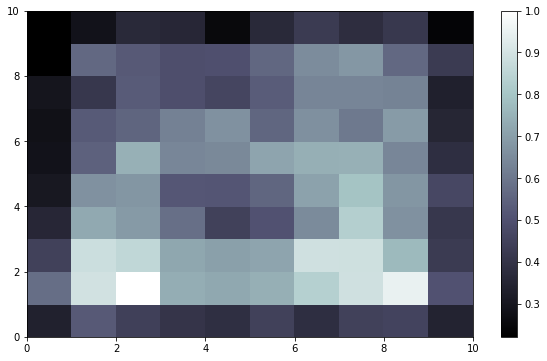

In [49]:
plt.figure(figsize=(10,6))
bone()
pcolor(som.distance_map().T)
colorbar()
show()

In [80]:
mappings=som.win_map(x)
frauds=mappings[(2,1)]
frauds=scaler.inverse_transform(frauds)

In [134]:
new_frauds=pd.DataFrame(frauds)

In [135]:
new_frauds=new_frauds[[17]]

In [136]:
type(new_frauds)

pandas.core.frame.DataFrame

In [137]:
new_frauds=new_frauds.astype('int')

In [139]:
new_frauds=new_frauds.rename(columns={17:'ID'})

In [141]:
new_fraud=pd.merge(new_frauds,df,on='ID')

In [142]:
new_fraud

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5009297,F,N,N,0,193500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,-16099,-1866,0,1,0,1
1,5009299,F,N,N,0,193500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,-16099,-1866,0,1,0,1
2,5009300,F,N,N,0,193500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,-16099,-1866,0,1,0,1
3,5009301,F,N,N,0,193500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,-16099,-1866,0,1,0,1
4,6153561,F,N,N,0,193500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,-16099,-1866,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,6630401,F,N,Y,0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-17988,-630,0,1,0,2
3268,6671795,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,With parents,-9191,-577,0,0,0,2
3269,6747221,M,N,Y,0,157500.0,Working,Secondary / secondary special,Single / not married,With parents,-9697,-255,0,0,0,1
3270,6764020,F,N,Y,0,144000.0,Working,Secondary / secondary special,Single / not married,With parents,-10574,-377,1,0,0,1


## this are the predicting 3272 customers,who are going to fraud if bank will approve their credit card. So, mys suggetion  is not to approve these customers applications.